<a href="https://colab.research.google.com/github/Kishankumar1328/Machine-Learning-Notes/blob/main/ML_ALGORITHM_NOTES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## **Regression**

# **Linear Regression**

**LINEAR REGRESSION**

Linear regression models the relationship between a dependent variable (y) and one or more independent variables (x) by fitting a straight line.

**Libraries:**

Use scikit-learn for implementation.

Common modules:

LinearRegression (for fitting the model).

train_test_split (for splitting datasets).

mean_squared_error (for error calculation).

**Steps:**

**Import required libraries:** numpy, pandas, matplotlib, sklearn.


**Load and preprocess data**  (handle missing values, scaling if necessary).

Split data into training and testing sets.

Initialize and fit the LinearRegression model.

Evaluate performance using metrics like R², MAE, MSE.

In [ ]:
df=pd.read_csv(r"/content/Employee_Salary_Dataset.csv")
df.head()

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000


In [ ]:
le=LabelEncoder()

df["Gender"]=le.fit_transform(df["Gender"])

In [ ]:
x=df[["Experience_Years","Age","Gender"]]
y=df["Salary"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
lm=LinearRegression()
lm.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_pred=lm.predict(x_test)

Text(0.5, 1.0, 'Autal VS Predicted')

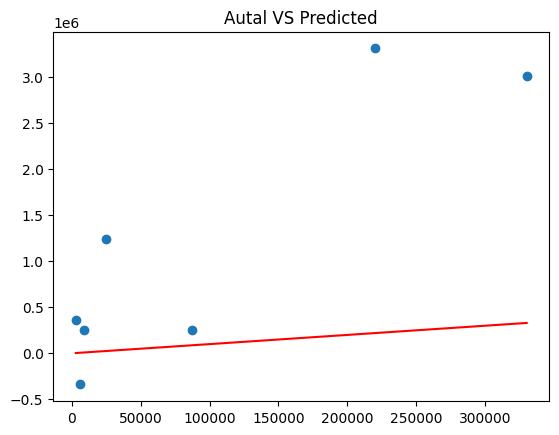

In [ ]:
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color="red")
plt.title("Autal VS Predicted")

In [ ]:
lm.score(x_train,y_train)

0.47063515266451295

# **Logistic Regression**

**Logistic Regression**

Logistic regression models the probability of a categorical outcome (binary or multiclass) based on one or more independent variables. It uses a sigmoid function to map predicted values to probabilities.

**Libraries:**
Use scikit-learn for implementation. Common modules:
LogisticRegression (for model fitting).
train_test_split (for splitting datasets).
classification_report and confusion_matrix (for evaluation).

**`Steps:`**
1. Import required libraries: numpy, pandas, matplotlib, sklearn.
2. Load and preprocess data: Handle missing values, encode categorical variables, and normalize data if necessary.
3. Split data: Divide data into training and testing sets.
4. Fit the Logistic Regression model: Use LogisticRegression from scikit-learn.
5. Evaluate performance: Metrics like accuracy, precision, recall, F1-score, and confusion matrix.



In [ ]:
df=pd.read_csv(r"/content/loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["Married"]=le.fit_transform(df["Married"])
df["Education"]=le.fit_transform(df["Education"])
df["Self_Employed"]=le.fit_transform(df["Self_Employed"])
df["Property_Area"]=le.fit_transform(df["Property_Area"])

In [ ]:
x=df[["Gender","Married","Education","Self_Employed","Property_Area"]]
y=df['Loan_Status']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
lm=LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lm.predict(x_test)

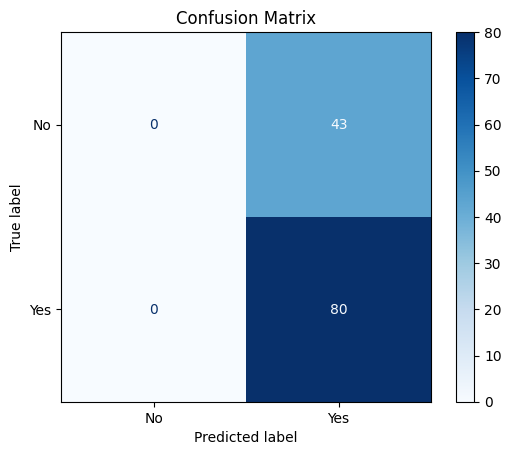

Confusion Matrix:
[[ 0 43]
 [ 0 80]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("Confusion Matrix:")
print(cm)


In [ ]:
lm.score(x_train,y_train)

0.6965376782077393

# **Clustering**

# **KNN**

**K-Nearest Neighbors (KNN)**


KNN is a non-parametric, instance-based algorithm used for classification and regression. It classifies a data point based on the majority vote of its k-nearest neighbors.

**Libraries:**

Use scikit-learn for implementation.
Common modules:

KNeighborsClassifier (for classification).

KNeighborsRegressor (for regression).

train_test_split (for splitting datasets).

classification_report and accuracy_score (for evaluation).

**Steps:**

**Import required libraries**: numpy, pandas, matplotlib, sklearn.

**Load and preprocess data**: Normalize or scale features (important for distance-based algorithms like KNN).

**Split data**: Divide data into training and testing sets.

**Initialize and fit the model**: Choose the number of neighbors k and use the KNeighborsClassifier or KNeighborsRegressor.

**Evaluate the model**: Use metrics like accuracy for classification or RMSE for regression.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df=pd.read_csv("/content/customer.csv")
df

,Customer ID,Name,Email,Phone,Total Revenue,Average Order Value (AOV),Lifetime Value (CLV),Purchase Frequency,Last Purchase Date,Customer Tier,Region,Preferred Channel,Engagement Score,Discount Usage (%)
0,CUST0001,Customer 1,customer1@example.com,+91-9786579303,2125.82,202.14,4589.78,17,2023-01-01,VIP,South,In-Store,57,69.97
1,CUST0002,Customer 2,customer2@example.com,+91-9219540831,7426.70,314.74,11444.56,3,2023-01-08,Regular,West,In-Store,44,94.27
2,CUST0003,Customer 3,customer3@example.com,+91-9126855092,2052.32,153.55,13994.82,7,2023-01-15,Regular,South,Online,24,50.05
3,CUST0004,Customer 4,customer4@example.com,+91-9896233790,4104.83,149.10,46729.71,39,2023-01-22,Low-value,East,In-Store,7,49.38
4,CUST0005,Customer 5,customer5@example.com,+91-9395310485,9900.47,81.95,44162.34,28,2023-01-29,Low-value,West,Online,33,8.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CUST0096,Customer 96,customer96@example.com,+91-9833953718,6673.84,388.34,27274.57,2,2024-11-02,Low-value,South,Online,57,53.86
96,CUST0097,Customer 97,customer97@example.com,+91-9795822698,4661.95,82.64,47022.62,3,2024-11-09,Low-value,West,Mobile App,16,34.51
97,CUST0098,Customer 98,customer98@example.com,+91-9176667861,5416.97,256.23,6651.75,16,2024-11-16,Low-value,West,In-Store,60,55.19
98,CUST0099,Customer 99,customer99@example.com,+91-9754049436,1649.54,499.30,48549.63,31,2024-11-23,Low-value,East,In-Store,89,54.34


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Region"]=le.fit_transform(df["Region"])


In [ ]:
x=df[["Total Revenue","Average Order Value (AOV)","Lifetime Value (CLV)","Purchase Frequency"]]
y=df["Region"]


In [ ]:
knn=KNeighborsClassifier()
knn.fit(x,y)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x)
y_pred

array([3, 3, 1, 3, 2, 1, 0, 3, 1, 1, 2, 3, 2, 1, 0, 2, 3, 3, 3, 3, 2, 2,
       0, 1, 1, 1, 2, 3, 1, 3, 0, 3, 0, 1, 1, 1, 3, 0, 0, 1, 1, 3, 2, 1,
       1, 2, 1, 1, 3, 3, 1, 3, 0, 0, 2, 0, 0, 3, 1, 1, 0, 1, 3, 3, 1, 0,
       0, 3, 1, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 3, 1, 0, 2, 2, 0, 0, 1, 3,
       3, 3, 0, 0, 2, 0, 2, 2, 3, 3, 0, 1])

Text(0.5, 1.0, 'KNN')

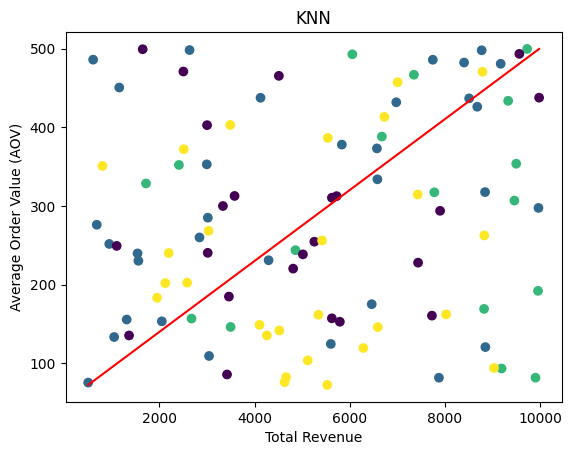

In [ ]:
plt.scatter(x["Total Revenue"],x["Average Order Value (AOV)"],c=y_pred)
plt.plot([min(x["Total Revenue"]),max(x["Total Revenue"])],[min(x["Average Order Value (AOV)"]),max(x["Average Order Value (AOV)"])],color="red")
plt.xlabel("Total Revenue")
plt.ylabel("Average Order Value (AOV)")
plt.title("KNN")

# **KMeans**

**K-Means Clustering**

K-Means is an unsupervised machine learning algorithm used for grouping data points into clusters based on their similarity. It minimizes the sum of squared distances between data points and their corresponding cluster centroids.

**Libraries:**
Use scikit-learn for implementation.

**Common modules:**

KMeans (for clustering).

train_test_split (if applicable, though often unnecessary for unsupervised learning).

metrics (for cluster evaluation, e.g., silhouette score).

**Steps:**
**Import required libraries**: numpy, pandas, matplotlib, seaborn, sklearn.

**Load and preprocess data**: Handle missing values and normalize or scale features for optimal performance.

**Initialize the model**: Specify the number of clusters (n_clusters) and fit the data using KMeans.

**Evaluate the model**: Use metrics like inertia, silhouette score, or cluster visualization.

**Interpret results**: Analyze clusters to identify patterns or similarities.

In [ ]:
df=pd.read_csv(r'/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x=df.drop(["Species"],axis=1)
y=df['Species']

In [ ]:
kmean=KMeans(n_clusters=3)
kmean.fit(x,y)
label=kmean.labels_

In [ ]:
pca=PCA(2)
pca.fit(x)
x_pca=pca.transform(x)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

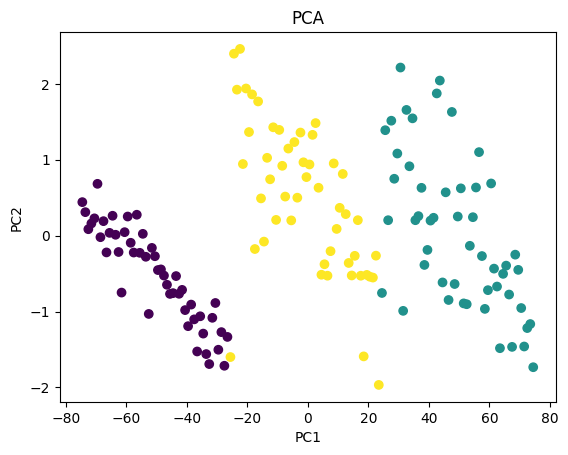

In [ ]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=label)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")
plt

# **Hierarchical Clustering**

**Hierarchical Clustering**

Hierarchical clustering is an unsupervised machine learning method that builds a hierarchy of clusters by either:

**Agglomerative (bottom-up)**: Each data point starts as its own cluster and merges with others iteratively.

**Divisive (top-down)**: All data points start in one cluster, which splits iteratively.

**Libraries:**

Use scipy for linkage and dendrograms.

Use sklearn for clustering and metrics.

**Steps:**
Import required libraries: numpy, pandas, matplotlib, seaborn, scipy.cluster.hierarchy, and sklearn.

Load and preprocess data: Handle missing values, and normalize or scale features.

**Perform clustering:**

Use linkage for hierarchical clustering.

Visualize the dendrogram for cluster decisions.

**Extract clusters:**

Use fcluster or AgglomerativeClustering to assign cluster labels.

Evaluate the model: Use metrics like silhouette score.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering


In [ ]:
x,y=make_blobs(n_samples=1000,n_features=5,centers=3)


In [ ]:
agg = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
agg.fit(x)
labels = agg.labels_


Text(0.5, 1.0, 'Hierarchical Clustering')

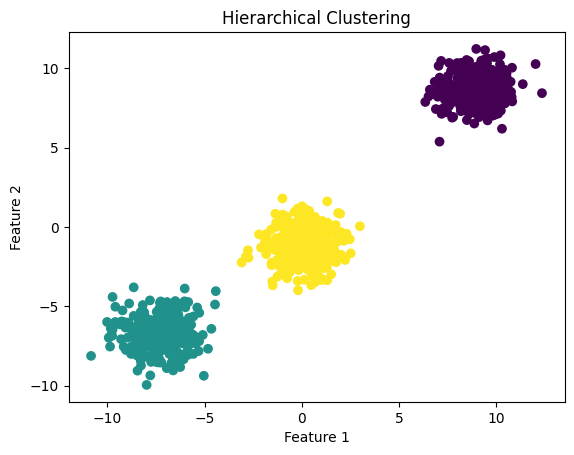

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Hierarchical Clustering")

Text(0.5, 1.0, 'Dendrogram')

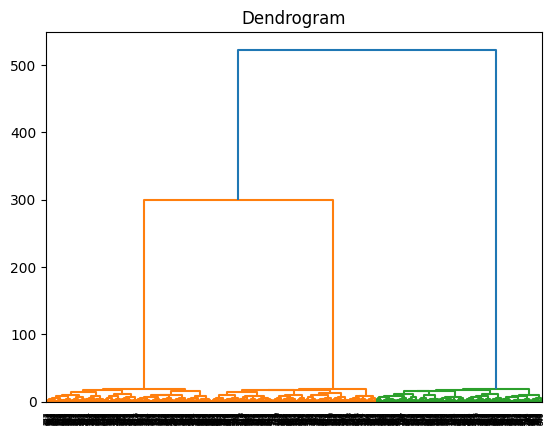

In [ ]:
linked=linkage(x,method='ward')
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title("Dendrogram")

# **Classification**

# **Bayesian Classifier**

**Bayesian Classifier (Naive Bayes)**


Naive Bayes is a probabilistic classifier based on Bayes' Theorem, assuming that features are conditionally independent. It is commonly used for text classification, spam filtering, and sentiment analysis.


**Bayes' Theorem:**
**P(A∣B)=P(B∣A)⋅P(A)/P(B)**
​


**Libraries:**
Use scikit-learn for implementation.

**Common modules:**

GaussianNB (for continuous data).

MultinomialNB (for discrete or count-based data, e.g., text classification).

BernoulliNB (for binary data).

**Steps:**

**Import required libraries**: numpy, pandas, sklearn.

**Load and preprocess data**: Handle missing values, encode categorical variables, and split the dataset.

**Choose the Naive Bayes variant**: Depending on the type of data (Gaussian, Multinomial, or Bernoulli).

**Fit the model**: Train the model on the training data.

**Evaluate the model**: Use metrics like accuracy, precision, recall, and F1-score.


In [ ]:
df=pd.read_csv("/content/loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["Married"]=le.fit_transform(df["Married"])
df["Education"]=le.fit_transform(df["Education"])
df["Self_Employed"]=le.fit_transform(df["Self_Employed"])
df["Property_Area"]=le.fit_transform(df["Property_Area"])

In [ ]:
x=df[["Gender","Married","Education","Self_Employed","Property_Area"]]
y=df['Loan_Status']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
NB=GaussianNB()
NB.fit(x_test,y_test)


GaussianNB()

In [ ]:
y_pred=NB.predict(x_test)

Text(0.5, 1.0, 'Confusion Matrix')

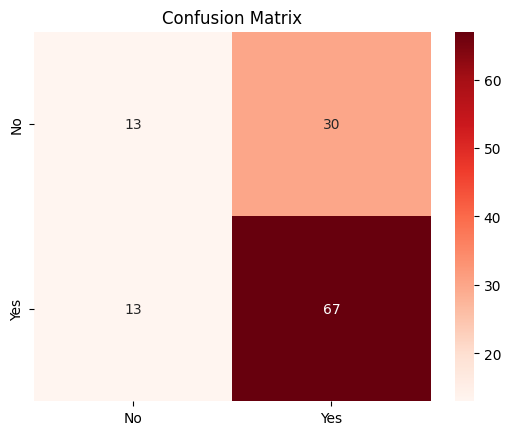

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Reds',xticklabels=['No','Yes'],yticklabels=['No','Yes'])
plt.title("Confusion Matrix")

# **SVM**

**Support Vector Machines (SVM)**

SVM is a supervised machine learning algorithm used for classification and regression. It works by finding the hyperplane that best separates data points into different classes with the maximum margin.

**Libraries:**

Use scikit-learn for implementation.

**Common modules:**

SVC (for classification).

SVR (for regression).

train_test_split (for splitting datasets).

StandardScaler (for feature scaling).

**Steps:**

**Import required libraries**: numpy, pandas, matplotlib, sklearn.

**Load and preprocess data**: Handle missing values, encode categorical data, and scale features (important for SVM).

**Initialize and fit the model**:Use SVC for classification or SVR for regression.

Choose a kernel (**linear, rbf, poly, or sigmoid**) based on the problem.

**Evaluate the model**: Use metrics like accuracy, precision, recall, or mean squared error.

**Hyperparameter Tuning**: Adjust C, kernel, and other parameters using techniques like grid search.


In [ ]:
df=pd.read_csv("/content/Employee_Salary_Dataset.csv")
df.head()

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000


In [ ]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [ ]:
x=df[["Experience_Years","Age",'Salary']]
y=df["Gender"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=svm.predict(x_test)

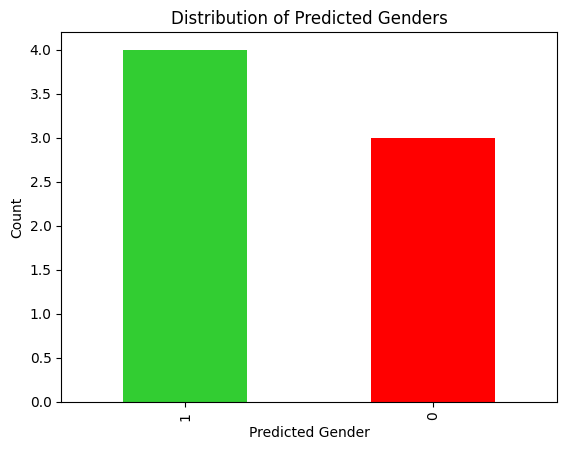

In [ ]:
count = pd.Series(y_test).value_counts()
count.plot(kind='bar', color=['limegreen', 'red'])
plt.xlabel('Predicted Gender')
plt.ylabel('Count')
plt.title('Distribution of Predicted Genders')
plt.show()

# **Tree Learning**

# **Random Forest Classifier**


**Random Forest Classifier**

Random Forest is an ensemble learning method that builds multiple decision trees during training and merges their outputs (via majority voting for classification) to improve accuracy and reduce overfitting.

**Libraries:**

Use scikit-learn for implementation.


**Common modules:**

RandomForestClassifier (for classification).

train_test_split (for splitting datasets).

accuracy_score, classification_report (for evaluation).

**Steps:**

**Import required libraries**: numpy, pandas, sklearn.

**Load and preprocess data**: Handle missing values and encode categorical features.

**Split dataset**: Divide data into training and testing sets.

**Initialize and fit the model**:Use RandomForestClassifier.
Tune hyperparameters like n_estimators, max_depth, etc.

**Evaluate the model**: Use metrics like accuracy, precision, recall, and F1-score.

**Feature importance analysis**: Identify the most significant predictors.

In [ ]:
df=pd.read_csv("/content/Employee_Salary_Dataset.csv")
df.head()

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000


In [ ]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [ ]:
x=df[["Experience_Years","Age",'Salary']]
y=df["Gender"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
estimators=rfc.estimators_[0]

[Text(0.6, 0.9, 'Salary <= 8450000.0\ngini = 0.477\nsamples = 18\nvalue = [11, 17]\nclass = Female'),
 Text(0.5, 0.7, 'Age <= 28.5\ngini = 0.453\nsamples = 16\nvalue = [9, 17]\nclass = Female'),
 Text(0.55, 0.8, 'True  '),
 Text(0.3, 0.5, 'Salary <= 137500.0\ngini = 0.494\nsamples = 6\nvalue = [5, 4]\nclass = Male'),
 Text(0.2, 0.3, 'Salary <= 12000.0\ngini = 0.444\nsamples = 4\nvalue = [2, 4]\nclass = Female'),
 Text(0.1, 0.1, '\n  (...)  \n'),
 Text(0.3, 0.1, '\n  (...)  \n'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]\nclass = Male'),
 Text(0.7, 0.5, 'Age <= 35.0\ngini = 0.36\nsamples = 10\nvalue = [4, 13]\nclass = Female'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 6]\nclass = Female'),
 Text(0.8, 0.3, 'Salary <= 3270500.0\ngini = 0.463\nsamples = 8\nvalue = [4, 7]\nclass = Female'),
 Text(0.7, 0.1, '\n  (...)  \n'),
 Text(0.9, 0.1, '\n  (...)  \n'),
 Text(0.7, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Male'),
 Text(0.6499999999999999, 0.8, ' 

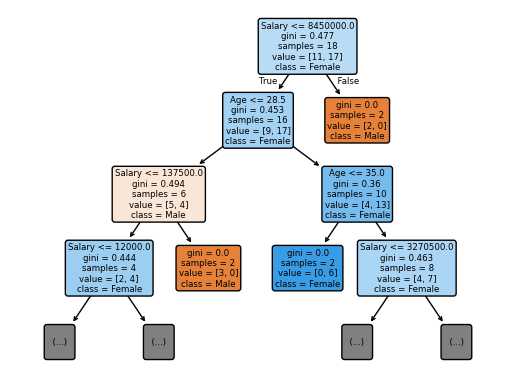

In [ ]:
plot_tree(estimators,feature_names=x.columns,class_names=["Male",'Female'],filled=True,rounded=True,max_depth=3)

In [ ]:
y_pred=rfc.predict(x_test)

In [ ]:
rfc.score(x_train,y_train)

1.0

# **Decision Tree Classifier**

**Decision Tree Classifier**

A Decision Tree is a supervised learning algorithm used for classification and regression tasks. It splits the dataset into branches based on conditions (features), forming a tree structure to make predictions.

**Libraries:**

Use scikit-learn for implementation.

**Common modules:**

DecisionTreeClassifier (for classification).

train_test_split (for splitting datasets).

accuracy_score and classification_report (for evaluation).

**Steps:**

**Import required libraries**: numpy, pandas, sklearn.

**Load and preprocess data**: Handle missing values and encode categorical features if necessary.

**Initialize and fit the model**:Use DecisionTreeClassifier.
Specify hyperparameters like criterion (e.g., gini, entropy), max_depth, etc.

**Evaluate the model**: Use metrics like accuracy, precision, recall, and F1-score.

**Visualize the tree**: Use plot_tree for visualization.


In [ ]:
df=pd.read_csv("/content/Employee_Salary_Dataset.csv")
df.head()

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000


In [ ]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [ ]:
x=df[["Experience_Years","Age",'Salary']]
y=df["Gender"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
dcf=DecisionTreeClassifier()
dcf.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.7, 0.9166666666666666, 'Salary <= 7750000.0\ngini = 0.497\nsamples = 28\nvalue = [15, 13]'),
 Text(0.6, 0.75, 'Salary <= 5000500.0\ngini = 0.499\nsamples = 25\nvalue = [12, 13]'),
 Text(0.6499999999999999, 0.8333333333333333, 'True  '),
 Text(0.5, 0.5833333333333334, 'Experience_Years <= 2.5\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.3, 0.4166666666666667, 'Salary <= 9500.0\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.2, 0.25, 'Age <= 22.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.1, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.3, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7, 0.4166666666666667, 'Age <= 28.5\ngini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.8, 0.25, 'Age <= 31.5\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.7, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.9, 0.08333333333333333, '\n  (...

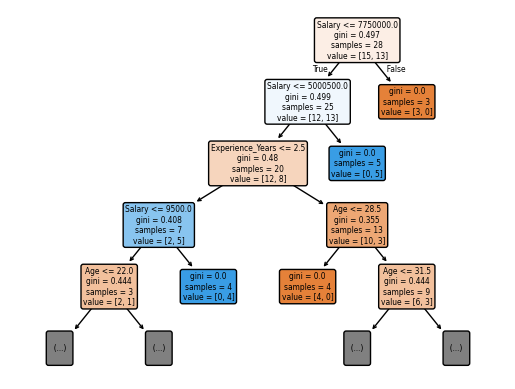

In [ ]:
plot_tree(dcf,feature_names=x.columns,filled=True,rounded=True,max_depth=4)

In [ ]:
dcf.score(x_train,y_train)

1.0

# **Gradient Boosting Classifier**

**Gradient Boosting Classifier**

Gradient Boosting is an ensemble learning algorithm that builds sequential decision trees, where each tree attempts to correct the errors of the previous one. It optimizes the model by minimizing the loss function using gradient descent.

**Libraries:**

Use scikit-learn for implementation.

**Common modules:**

GradientBoostingClassifier (for classification).

train_test_split (for splitting datasets).

accuracy_score, classification_report (for evaluation).

**Steps**:

**Import required libraries**: numpy, pandas, matplotlib, sklearn.

**Load and preprocess data**: Handle missing values and encode categorical features.

**Split the dataset**: Divide the data into training and testing sets.

**Initialize and fit the model**:Use GradientBoostingClassifier.

**Tune hyperparameters** like n_estimators, learning_rate, max_depth, etc.

**Evaluate the model**: Use metrics like accuracy, precision, recall, and F1-score.

**Analyze feature importance**: Understand which features contribute most to predictions.


In [ ]:
df=pd.read_csv("/content/Employee_Salary_Dataset.csv")
df.head()

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000


In [ ]:
x=df[["Experience_Years","Age",'Salary']]
y=df["Gender"]

In [ ]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
GBC=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred=GBC.predict(x_test)

[Text(0.6666666666666666, 0.875, 'Salary <= 7750000.0\nfriedman_mse = 0.249\nsamples = 28\nvalue = -0.0'),
 Text(0.5, 0.625, 'Salary <= 5000500.0\nfriedman_mse = 0.25\nsamples = 25\nvalue = 0.056'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'Experience_Years <= 2.5\nfriedman_mse = 0.24\nsamples = 20\nvalue = -0.064'),
 Text(0.16666666666666666, 0.125, 'friedman_mse = 0.204\nsamples = 7\nvalue = 1.005'),
 Text(0.5, 0.125, 'friedman_mse = 0.178\nsamples = 13\nvalue = -0.939'),
 Text(0.6666666666666666, 0.375, 'friedman_mse = -0.0\nsamples = 5\nvalue = 2.154'),
 Text(0.8333333333333334, 0.625, 'friedman_mse = 0.0\nsamples = 3\nvalue = -1.867'),
 Text(0.75, 0.75, '  False')]

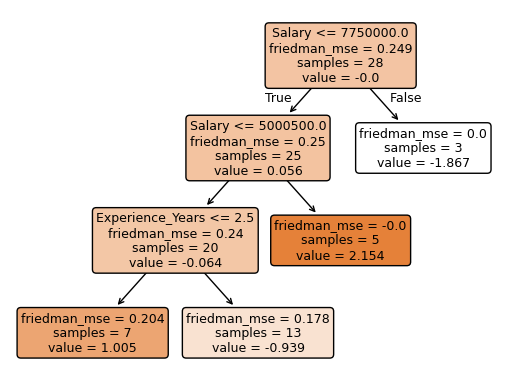

In [ ]:
plot_tree(GBC.estimators_[0,0],feature_names=x.columns,filled=True,rounded=True,max_depth=3)

In [ ]:
GBC.score(x_train,y_train)

1.0